# Importing Packages and Prepared Data

In [1]:
import numpy as np
from numpy import mean, std
from scipy.stats import sem
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Dropping 'ViolentCrimesPerPop' because it is exactly related to 'CrimeCategory' and will therefore bias the predictive values of the features.
vif_df_5 = pd.read_csv("/content/gdrive/MyDrive/vif_elimination_5.csv")
vif_df_5 = vif_df_5.drop(["ViolentCrimesPerPop"], axis=1)
vif_df_5.head()

,state,fold,racepctblack,racePctAsian,racePctHisp,agePct12t21,pctUrban,pctWFarmSelf,pctWPubAsst,pctWRetire,...,NumStreet,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,CrimeCategory
0,8,1,0.02,0.12,0.17,0.34,1.0,0.34,0.15,0.43,...,0.0,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,Very Low
1,53,1,0.12,0.45,0.07,0.26,1.0,0.11,0.29,0.39,...,0.0,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,High
2,24,1,0.49,0.17,0.04,0.39,0.0,0.19,0.40,0.84,...,0.0,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,Medium
3,34,1,1.00,0.12,0.10,0.51,1.0,0.21,0.20,0.82,...,0.0,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,Very Low
4,42,1,0.02,0.09,0.05,0.38,0.9,0.16,0.11,0.71,...,0.0,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,Very Low


In [3]:
vif_df_3 = pd.read_csv("/content/gdrive/MyDrive/vif_elimination_3.csv")
vif_df_3 = vif_df_3.drop(["ViolentCrimesPerPop"], axis=1)
vif_df_3.head()

,state,fold,racepctblack,racePctAsian,racePctHisp,agePct12t21,pctUrban,pctWFarmSelf,pctWPubAsst,pctWRetire,...,NumStreet,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,CrimeCategory
0,8,1,0.02,0.12,0.17,0.34,1.0,0.34,0.15,0.43,...,0.0,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,Low
1,53,1,0.12,0.45,0.07,0.26,1.0,0.11,0.29,0.39,...,0.0,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,High
2,24,1,0.49,0.17,0.04,0.39,0.0,0.19,0.40,0.84,...,0.0,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,High
3,34,1,1.00,0.12,0.10,0.51,1.0,0.21,0.20,0.82,...,0.0,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,Low
4,42,1,0.02,0.09,0.05,0.38,0.9,0.16,0.11,0.71,...,0.0,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,Low


In [4]:
#Creating features and targets for training models.
features_5 = vif_df_5.iloc[:, :-1]
target_5 = vif_df_5.iloc[:, -1]
features_3 = vif_df_3.iloc[:, :-1]
target_3 = vif_df_3.iloc[:, -1]

# Decision Tree Classifiers

In [5]:
#Splitting the data into 80% training data, 20% testing data
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(features_5, target_5, test_size=0.2,random_state=109)

In [6]:
#Initializing Decision Tree Classifier
clf_5 = tree.DecisionTreeClassifier()
clf_5 = clf_5.fit(X_train_5, y_train_5)

In [7]:
#Initial testing shows an f1 score of 0.34 and a Matthews Correlation Coefficient of 0.28. 'Very Low' is as usual overrepresented in the sample and the model
#struggles to perform on every metric for other classes, particularly 'High' and 'Medium'
y_pred_5= clf_5.predict(X_test_5)
print(classification_report(y_test_5, y_pred_5))
print('Matthews:',matthews_corrcoef(y_test_5, y_pred_5))

              precision    recall  f1-score   support

        High       0.12      0.14      0.13        21
         Low       0.32      0.29      0.31        92
      Medium       0.11      0.13      0.12        31
   Very High       0.36      0.27      0.31        15
    Very Low       0.79      0.80      0.80       240

    accuracy                           0.58       399
   macro avg       0.34      0.33      0.33       399
weighted avg       0.58      0.58      0.58       399

Matthews: 0.26362396026431556


In [8]:
clf_sk_5 = tree.DecisionTreeClassifier()

Cross-Validating The Model

I used two cross-validation methods: RepeatedKFold validation and StratifiedKFold validation. I chose to use both as I can see from my initial test that one class is over-represented in the data, which means that stratified sampling for cross-validation could be effective in improving the performance of the model.

>1 f1=0.3625 se=0.010
>2 f1=0.3817 se=0.007
>3 f1=0.3864 se=0.008
>4 f1=0.3940 se=0.008
>5 f1=0.3827 se=0.007
>6 f1=0.3803 se=0.007
>7 f1=0.3845 se=0.005
>8 f1=0.3802 se=0.005
>9 f1=0.3781 se=0.005
>10 f1=0.3848 se=0.005
>11 f1=0.3868 se=0.005
>12 f1=0.3879 se=0.004
>13 f1=0.3864 se=0.004
>14 f1=0.3817 se=0.004
>15 f1=0.3822 se=0.004


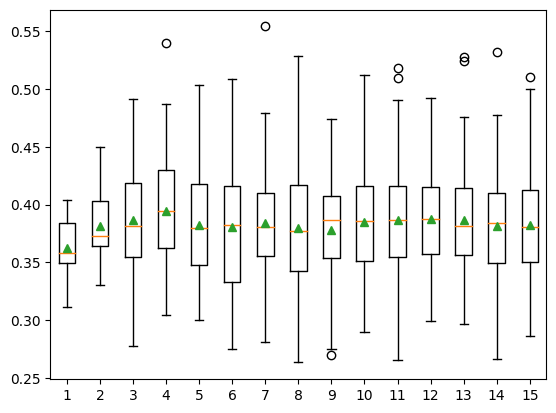

In [9]:
#For this Stratified K-Fold model I chose 4 repeats as it optimizes the model by providing asymmetrical distribution as well as a fairly low standard of error
#without sacrificing the f1 score and without having too many outliers.
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = tree.DecisionTreeClassifier()
 scores_clf_5 = cross_val_score(model, features_5, target_5, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_clf_5
repeats = range(1,16)
results_clf_5 = list()
for r in repeats:
 scores_clf_5 = evaluate_model(features_5, target_5, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_clf_5), sem(scores_clf_5)))
 results_clf_5.append(scores_clf_5)

plt.boxplot(results_clf_5, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [10]:
#This Stratified K-fold model results in an average f1 score of 0.39 which is slightly higher than the initial test, as well as MCC score of 0.327 which
#is also higher than the initial test. The MCC score is also more closely related to the f1 score, which indicates that this metric is more accurate to the
#model's performance on positive and negative identifications.
skf_5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_5.split(features_5, target_5):
    x_train_fold, x_test_fold = features_5.iloc[train_index], features_5.iloc[test_index]
    y_train_fold, y_test_fold = target_5[train_index], target_5[test_index]
    clf_sk_5.fit(x_train_fold, y_train_fold)
    y_pred = clf_sk_5.predict(x_test_fold)
    lst_accu_stratified.append(clf_sk_5.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy that can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores = cross_val_score(clf_sk_5, features_5, target_5, scoring='f1_macro', cv=skf_5, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_matthews = cross_val_score(clf_sk_5, features_5, target_5, scoring='matthews_corrcoef', cv=skf_5, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy that can be obtained from this model is: 68.34170854271356 %

Minimum Accuracy: 56.00000000000001 %

Overall Accuracy: 60.7821608040201 %

Standard Deviation is: 0.02917350803159302
F1: 0.388 (0.049)
Matthews: 0.333 (0.045)


>1 f1=0.3725 se=0.011
>2 f1=0.3774 se=0.010
>3 f1=0.3659 se=0.008
>4 f1=0.3777 se=0.007
>5 f1=0.3772 se=0.006
>6 f1=0.3726 se=0.006
>7 f1=0.3744 se=0.005
>8 f1=0.3789 se=0.005
>9 f1=0.3759 se=0.004
>10 f1=0.3795 se=0.004
>11 f1=0.3736 se=0.004
>12 f1=0.3823 se=0.004
>13 f1=0.3744 se=0.003
>14 f1=0.3774 se=0.003
>15 f1=0.3780 se=0.003


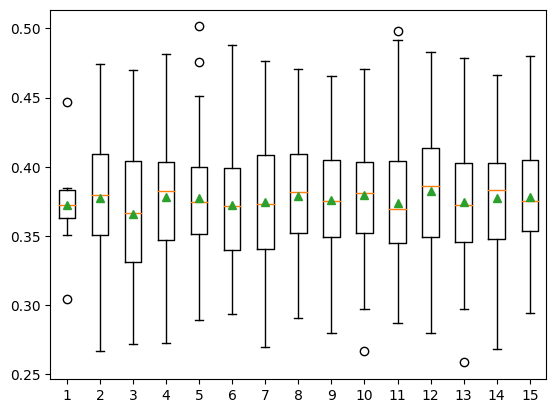

In [11]:
#In this case, 10 repeats is the most optimal for the model based on previously discussed metrics.
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = tree.DecisionTreeClassifier()
 scores_clf_5 = cross_val_score(model, features_5, target_5, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_clf_5
repeats = range(1,16)
results_clf_5 = list()
for r in repeats:
 scores_clf_5 = evaluate_model(features_5, target_5, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_clf_5), sem(scores_clf_5)))
 results_clf_5.append(scores_clf_5)

plt.boxplot(results_clf_5, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [12]:
#The f1 score on the repeated K-fold model is 0.38, while the MCC score is 0.33, again indicating that the f1 score is more representative of the model's actual
#performance than in the initial test. Though the f1 score is fairly stable across cross-validation models, the increase in MCC and the closer it becomes to f1
#score indicates that cross-validation should be used to train accurate models for this dataset.
cv_5 = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
acc_scores = cross_val_score(clf_5, features_5, target_5, scoring='accuracy', cv=cv_5, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(acc_scores), std(acc_scores)))
scores_f1 = cross_val_score(clf_5, features_5, target_5, scoring='f1_macro', cv=cv_5, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(clf_5, features_5, target_5, scoring='matthews_corrcoef', cv=cv_5, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

Accuracy: 0.602 (0.032)
F1: 0.379 (0.043)
Matthews: 0.324 (0.043)


Repeating with the 3 Class Dataset

In [13]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(features_3, target_3, test_size=0.2,random_state=109)

In [14]:
clf_3 = tree.DecisionTreeClassifier()
clf_3 = clf_3.fit(X_train_3, y_train_3)

In [15]:
#The f1 score of this model is improved from the model trained on 5 classes, however the MCC score indicates that the f1 score may not be accurate to the model's
#performance, as it falls behind at 0.32.
y_pred_3 = clf_3.predict(X_test_3)
print(classification_report(y_test_3, y_pred_3))
print('Matthews:',matthews_corrcoef(y_test_3, y_pred_3))

              precision    recall  f1-score   support

        High       0.52      0.55      0.54        67
         Low       0.81      0.81      0.81       270
      Medium       0.19      0.18      0.18        62

    accuracy                           0.67       399
   macro avg       0.51      0.51      0.51       399
weighted avg       0.67      0.67      0.67       399

Matthews: 0.3277336394768182


In [16]:
clf_sk_3 = tree.DecisionTreeClassifier()

>1 f1=0.5819 se=0.007
>2 f1=0.5622 se=0.008
>3 f1=0.5576 se=0.007
>4 f1=0.5599 se=0.006
>5 f1=0.5577 se=0.005
>6 f1=0.5651 se=0.004
>7 f1=0.5582 se=0.004
>8 f1=0.5540 se=0.004
>9 f1=0.5550 se=0.004
>10 f1=0.5569 se=0.004
>11 f1=0.5544 se=0.003
>12 f1=0.5561 se=0.003
>13 f1=0.5555 se=0.003
>14 f1=0.5551 se=0.003
>15 f1=0.5559 se=0.003


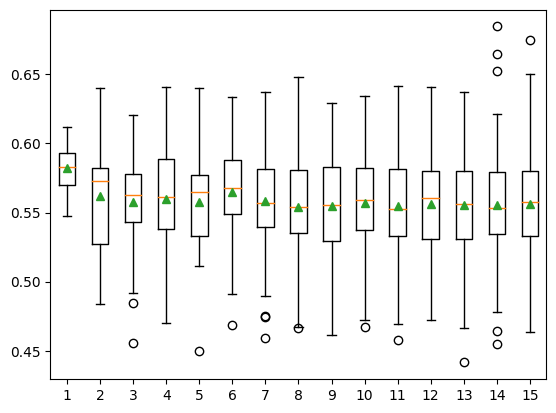

In [17]:
#Based on previously mentioned metrics, I chose to use 12 repeats for this Stratified K-fold model.
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = tree.DecisionTreeClassifier()
 scores_clf_3 = cross_val_score(model, features_3, target_3, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_clf_3
repeats = range(1,16)
results_clf_3 = list()
for r in repeats:
 scores_clf_3 = evaluate_model(features_3, target_3, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_clf_3), sem(scores_clf_3)))
 results_clf_3.append(scores_clf_3)

plt.boxplot(results_clf_3, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [18]:
#The average f1 score improves slightly to 0.56, while the MCC score still trails behind at 0.41, though the two values are closer than before.
skf_3 = RepeatedStratifiedKFold(n_splits=10, n_repeats=12, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_3.split(features_3, target_3):
    x_train_fold, x_test_fold = features_3.iloc[train_index], features_3.iloc[test_index]
    y_train_fold, y_test_fold = target_3[train_index], target_3[test_index]
    clf_sk_3.fit(x_train_fold, y_train_fold)
    y_pred = clf_sk_3.predict(x_test_fold)
    lst_accu_stratified.append(clf_sk_3.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores = cross_val_score(clf_sk_3, features_3, target_3, scoring='f1_macro', cv=skf_3, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_matthews = cross_val_score(clf_sk_3, features_3, target_3, scoring='matthews_corrcoef', cv=skf_3, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 76.88442211055276 %

Minimum Accuracy: 62.0 %

Overall Accuracy: 70.34455611390285 %

Standard Deviation is: 0.029213336890341734
F1: 0.558 (0.037)
Matthews: 0.409 (0.052)


>1 f1=0.5506 se=0.010
>2 f1=0.5497 se=0.009
>3 f1=0.5485 se=0.009
>4 f1=0.5454 se=0.006
>5 f1=0.5476 se=0.006
>6 f1=0.5555 se=0.006
>7 f1=0.5495 se=0.005
>8 f1=0.5509 se=0.004
>9 f1=0.5523 se=0.004
>10 f1=0.5508 se=0.004
>11 f1=0.5518 se=0.003
>12 f1=0.5548 se=0.003
>13 f1=0.5510 se=0.003
>14 f1=0.5505 se=0.003
>15 f1=0.5517 se=0.003


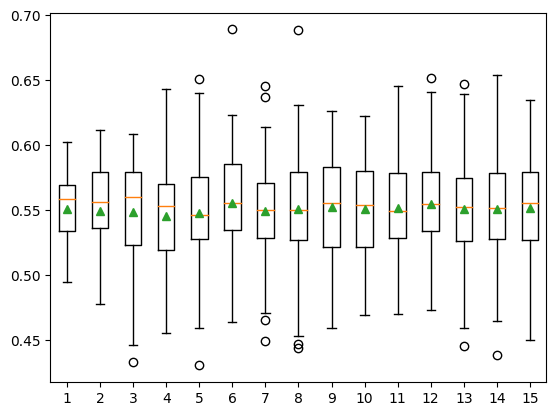

In [19]:
#For this Repeated K-fold model I chose 14 repeats based on evaluation metrics.
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = tree.DecisionTreeClassifier()
 scores_clf_3 = cross_val_score(model, features_3, target_3, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_clf_3
repeats = range(1,16)
results_clf_3 = list()
for r in repeats:
 scores_clf_3 = evaluate_model(features_3, target_3, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_clf_3), sem(scores_clf_3)))
 results_clf_3.append(scores_clf_3)

plt.boxplot(results_clf_3, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [20]:
#Once again, the f1 score and thhe MCC score are stable but not closely related at 0.55 and 0.40 respectively. This tells me that though the model is stable, the
#f1 score should not be relied upon as the evaluation metric, and cross-validation should definitely be used to train the model.
cv_3 = RepeatedKFold(n_splits=10, n_repeats=7, random_state=1)
acc_scores = cross_val_score(clf_3, features_3, target_3, scoring='accuracy', cv=cv_3, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(acc_scores), std(acc_scores)))
scores = cross_val_score(clf_3, features_3, target_3, scoring='f1_macro', cv=cv_3, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_matthews = cross_val_score(clf_3, features_3, target_3, scoring='matthews_corrcoef', cv=cv_3, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

Accuracy: 0.700 (0.027)
F1: 0.548 (0.042)
Matthews: 0.401 (0.058)


# Logistic Regression Models

In [21]:
X_train_set_5, X_test_set_5, Y_train_set_5, Y_test_set_5 = train_test_split(features_5, target_5, train_size=0.8, random_state=25)

In [22]:
lr_model_5 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
lr_model_5.fit(X_train_set_5, Y_train_set_5)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [23]:
#f1 score for initial test is 0.40 and fairly closely related to MCC score of 0.36.
y_pred_lr_5 = lr_model_5.predict(X_test_set_5)
print(classification_report(Y_test_set_5, y_pred_lr_5))
print('Matthews:', matthews_corrcoef(Y_test_set_5, y_pred_lr_5))

              precision    recall  f1-score   support

        High       0.33      0.04      0.06        28
         Low       0.37      0.32      0.34        91
      Medium       0.13      0.12      0.12        25
   Very High       0.61      0.70      0.65        20
    Very Low       0.78      0.90      0.84       235

    accuracy                           0.65       399
   macro avg       0.44      0.42      0.40       399
weighted avg       0.61      0.65      0.62       399

Matthews: 0.3644843515221849


In [24]:
lr_model_sk_5 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

>1 f1=0.4134 se=0.009
>2 f1=0.4179 se=0.009
>3 f1=0.4160 se=0.008
>4 f1=0.4152 se=0.007
>5 f1=0.4140 se=0.006
>6 f1=0.4147 se=0.005
>7 f1=0.4161 se=0.005
>8 f1=0.4161 se=0.004
>9 f1=0.4162 se=0.004
>10 f1=0.4156 se=0.004
>11 f1=0.4162 se=0.004
>12 f1=0.4154 se=0.004
>13 f1=0.4156 se=0.003
>14 f1=0.4157 se=0.003
>15 f1=0.4155 se=0.003


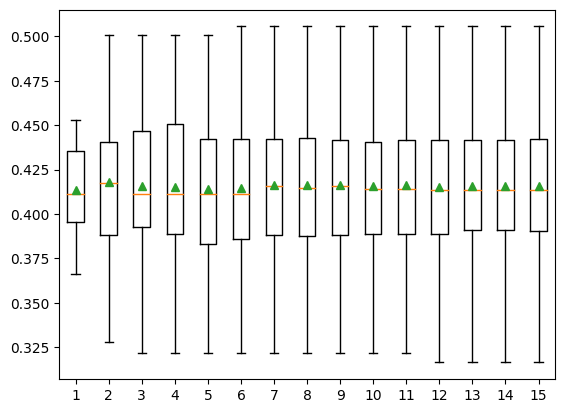

In [25]:
#Based on evaluation metrics, I chose 13 repeats for this model. Once again, it is worth nothing that Logistic Regression models are considerably more time
#consuming than other models, with initialization for Straified K-fold validation taking 18mins.
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
 scores_lr_5 = cross_val_score(model, features_5, target_5, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_lr_5
repeats = range(1,16)
results_lr_5 = list()
for r in repeats:
 scores_lr_5 = evaluate_model(features_5, target_5, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_lr_5), sem(scores_lr_5)))
 results_lr_5.append(scores_lr_5)

plt.boxplot(results_lr_5, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [26]:
#f1 score remains relatively stable at 0.41, while MCC score increases to 0.43 and becomes more closely related to f1 score, indicating that
#Stratified K-fold cross-validation improves the performance of the model. Again, the effiency is low at 11 mins to perform cross-validation.
skf_lr_5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=13, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_lr_5.split(features_5, target_5):
    x_train_fold, x_test_fold = features_5.iloc[train_index], features_5.iloc[test_index]
    y_train_fold, y_test_fold = target_5[train_index], target_5[test_index]
    lr_model_sk_5.fit(x_train_fold, y_train_fold)
    y_pred = lr_model_sk_5.predict(x_test_fold)
    lst_accu_stratified.append(lr_model_sk_5.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores = cross_val_score(lr_model_sk_5, features_5, target_5, scoring='f1_macro', cv=skf_lr_5, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores), std(scores)))
scores_matthews = cross_val_score(lr_model_sk_5, features_5, target_5, scoring='matthews_corrcoef', cv=skf_lr_5, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 73.5 %

Minimum Accuracy: 61.30653266331658 %

Overall Accuracy: 68.66810977966757 %

Standard Deviation is: 0.02298535093893014
F1: 0.416 (0.038)
Matthews: 0.432 (0.044)


>1 f1=0.4103 se=0.008
>2 f1=0.4047 se=0.009
>3 f1=0.4113 se=0.007
>4 f1=0.4116 se=0.006
>5 f1=0.4124 se=0.006
>6 f1=0.4129 se=0.005
>7 f1=0.4123 se=0.005
>8 f1=0.4128 se=0.004
>9 f1=0.4134 se=0.004
>10 f1=0.4119 se=0.004
>11 f1=0.4118 se=0.004
>12 f1=0.4105 se=0.004
>13 f1=0.4102 se=0.003
>14 f1=0.4109 se=0.003
>15 f1=0.4112 se=0.003


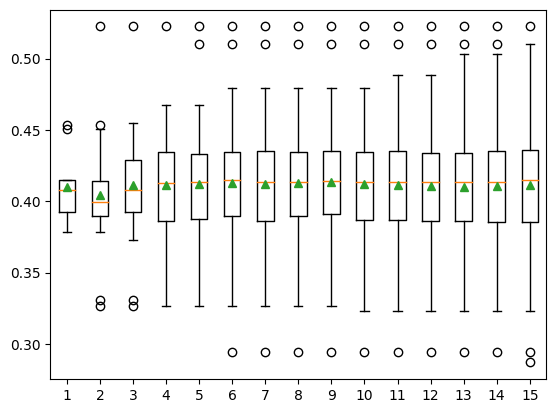

In [27]:
#For this model I chose to use 8 repeats based on evaluation metrics. Initialization took 17mins.
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
 scores_lr_5 = cross_val_score(model, features_5, target_5, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_lr_5
repeats = range(1,16)
results_lr_5 = list()
for r in repeats:
 scores_lr_5 = evaluate_model(features_5, target_5, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_lr_5), sem(scores_lr_5)))
 results_lr_5.append(scores_lr_5)

plt.boxplot(results_lr_5, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [28]:
#f1 score and MCC score are the same Stratified K-fold at 0.41 and 0.43 respectively. Indicates that either cross-validation technique can be used to improve
#model performance but that overall it remains stable. Smaller number of repeats resulted in shorter processing time of 4min.
cv_5 = RepeatedKFold(n_splits=10, n_repeats=8, random_state=1)
acc_scores = cross_val_score(lr_model_5, features_5, target_5, scoring='accuracy', cv=cv_5, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(acc_scores), std(acc_scores)))
scores_f1 = cross_val_score(lr_model_5, features_5, target_5, scoring='f1_macro', cv=cv_5, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(lr_model_5, features_5, target_5, scoring='matthews_corrcoef', cv=cv_5, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

Accuracy: 0.685 (0.025)
F1: 0.411 (0.039)
Matthews: 0.429 (0.038)


Repeating with the 3 Class Dataset

In [29]:
X_train_set_3, X_test_set_3, Y_train_set_3, Y_test_set_3 = train_test_split(features_3, target_3, train_size=0.8, random_state=25)

In [30]:
lr_model_3 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=20000)
lr_model_3.fit(X_train_set_3, Y_train_set_3)

LogisticRegression(max_iter=20000, multi_class='multinomial')

In [31]:
#f1 score is improved from 5-class model at 0.57 withh a closely related MCC score of 0.53
y_pred_3 = lr_model_3.predict(X_test_set_3)
print(classification_report(Y_test_set_3, y_pred_3))
print('Matthews:', matthews_corrcoef(Y_test_set_3, y_pred_3))

              precision    recall  f1-score   support

        High       0.71      0.74      0.72        73
         Low       0.82      0.95      0.88       265
      Medium       0.27      0.07      0.11        61

    accuracy                           0.78       399
   macro avg       0.60      0.59      0.57       399
weighted avg       0.72      0.78      0.74       399

Matthews: 0.5273057587455766


In [32]:
lr_model_sk_3 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=20000)

>1 f1=0.5745 se=0.013
>2 f1=0.5696 se=0.008
>3 f1=0.5704 se=0.007
>4 f1=0.5717 se=0.006
>5 f1=0.5715 se=0.005
>6 f1=0.5706 se=0.004
>7 f1=0.5693 se=0.004
>8 f1=0.5692 se=0.004
>9 f1=0.5702 se=0.004
>10 f1=0.5705 se=0.004
>11 f1=0.5715 se=0.003
>12 f1=0.5716 se=0.003
>13 f1=0.5715 se=0.003
>14 f1=0.5715 se=0.003
>15 f1=0.5717 se=0.003


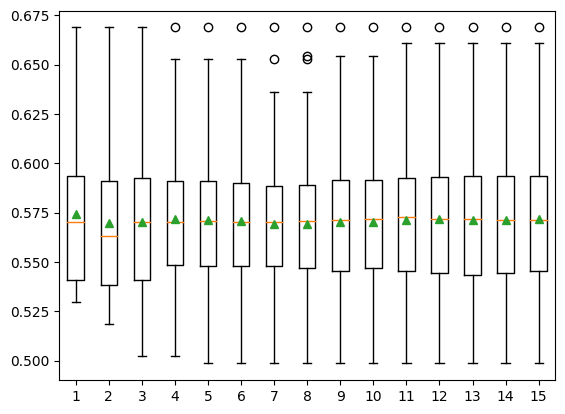

In [33]:
#For this Stratified K-fold method I chose 12 repeats based on previously mentioned evaluation metrics. Processing time still costly at 15min.
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=20000)
 scores_lr_3 = cross_val_score(model, features_3, target_3, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_lr_3
repeats = range(1,16)
results_lr_3 = list()
for r in repeats:
 scores_lr_3 = evaluate_model(features_3, target_3, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_lr_3), sem(scores_lr_3)))
 results_lr_3.append(scores_lr_3)

plt.boxplot(results_lr_3, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [34]:
#f1 score and MCC score are stable at 0.57 and 0.52 respectively, indicating the model's stability before and after cross-validation. Processing time improved from
#5-class model at 5 min.
skf_lr_3 = RepeatedStratifiedKFold(n_splits=10, n_repeats=12, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_lr_3.split(features_3, target_3):
    x_train_fold, x_test_fold = features_3.iloc[train_index], features_3.iloc[test_index]
    y_train_fold, y_test_fold = target_3[train_index], target_3[test_index]
    lr_model_sk_3.fit(x_train_fold, y_train_fold)
    y_pred = lr_model_sk_3.predict(x_test_fold)
    lst_accu_stratified.append(lr_model_sk_3.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(lr_model_sk_3, features_3, target_3, scoring='f1_macro', cv=skf_lr_3, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(lr_model_sk_3, features_3, target_3, scoring='matthews_corrcoef', cv=skf_lr_3, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 83.91959798994975 %

Minimum Accuracy: 73.5 %

Overall Accuracy: 78.03867252931323 %

Standard Deviation is: 0.02073122472525576
F1: 0.572 (0.037)
Matthews: 0.521 (0.050)


>1 f1=0.5736 se=0.014
>2 f1=0.5744 se=0.010
>3 f1=0.5728 se=0.008
>4 f1=0.5737 se=0.007
>5 f1=0.5755 se=0.006
>6 f1=0.5741 se=0.005
>7 f1=0.5755 se=0.005
>8 f1=0.5750 se=0.004
>9 f1=0.5748 se=0.004
>10 f1=0.5750 se=0.004
>11 f1=0.5763 se=0.004
>12 f1=0.5766 se=0.003
>13 f1=0.5763 se=0.003
>14 f1=0.5756 se=0.003
>15 f1=0.5754 se=0.003


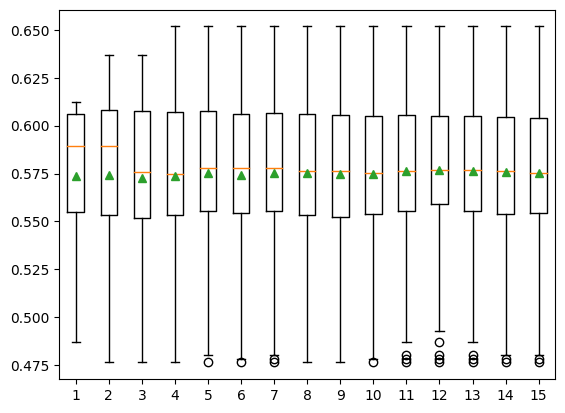

In [35]:
#For this model, 8 repeats is optimal. Processing time is still an issue at 15 mins.
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=20000)
 scores_lr_3 = cross_val_score(model, features_3, target_3, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_lr_3
repeats = range(1,16)
results_lr_3 = list()
for r in repeats:
 scores_lr_3 = evaluate_model(features_3, target_3, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_lr_3), sem(scores_lr_3)))
 results_lr_3.append(scores_lr_3)

plt.boxplot(results_lr_3, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [36]:
#f1 score and MCC score are still almost the same at 0.58 and 0.52. Model is stable and performs slightly worse when True Negative values are included.
cv_3 = RepeatedKFold(n_splits=10, n_repeats=8, random_state=1)
acc_scores = cross_val_score(lr_model_3, features_3, target_3, scoring='accuracy', cv=cv_3, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(acc_scores), std(acc_scores)))
scores_f1 = cross_val_score(lr_model_3, features_3, target_3, scoring='f1_macro', cv=cv_3, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(lr_model_3, features_3, target_3, scoring='matthews_corrcoef', cv=cv_3, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

Accuracy: 0.781 (0.026)
F1: 0.575 (0.039)
Matthews: 0.520 (0.058)


# K Nearest Neighbors Classifiers

In [37]:
x_train_5, x_test_5, Y_train_5, Y_test_5 = train_test_split(features_5, target_5, train_size = 0.8, random_state=42)

In [38]:
#Initializing K Nearest Neighbors and finding optimal number of neighbors. Here the best choice is K=7.
f1 = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_5,Y_train_5)
    yhat_5 = neigh.predict(x_test_5)
    f1.append(metrics.f1_score(Y_test_5, yhat_5, average='macro'))
print("Maximum f1:-",max(f1),"at K =",f1.index(max(f1)))
MCC = []
for i in range (1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_5,Y_train_5)
    yhat_5 = neigh.predict(x_test_5)
    MCC.append(matthews_corrcoef(Y_test_5, yhat_5))
print("Maximum MCC:-",max(MCC),"at K =",MCC.index(max(MCC)))

Maximum f1:- 0.3353371711125221 at K = 7
Maximum MCC:- 0.33750191378454775 at K = 7


In [39]:
#The initial f1 score is 0.29 and the MCC scoroe is 0.33, indicating the model is more accurate when including True Negative values.
classifier_5 = KNeighborsClassifier(n_neighbors=7)
classifier_5.fit(x_train_5, Y_train_5)
Y_pred_5 = classifier_5.predict(x_test_5)
print(classification_report(Y_test_5, Y_pred_5))
print('Matthews:', matthews_corrcoef(Y_test_5, Y_pred_5))

              precision    recall  f1-score   support

        High       0.20      0.06      0.10        16
         Low       0.33      0.44      0.38        72
      Medium       0.25      0.08      0.12        38
   Very High       0.00      0.00      0.00        11
    Very Low       0.81      0.89      0.85       262

    accuracy                           0.67       399
   macro avg       0.32      0.29      0.29       399
weighted avg       0.63      0.67      0.64       399

Matthews: 0.3276388453716856


In [40]:
classifier_sk_5 = KNeighborsClassifier(n_neighbors=7)

>1 f1=0.3352 se=0.015
>2 f1=0.3298 se=0.008
>3 f1=0.3322 se=0.007
>4 f1=0.3338 se=0.006
>5 f1=0.3334 se=0.005
>6 f1=0.3330 se=0.005
>7 f1=0.3330 se=0.004
>8 f1=0.3316 se=0.004
>9 f1=0.3312 se=0.004
>10 f1=0.3309 se=0.004
>11 f1=0.3311 se=0.004
>12 f1=0.3312 se=0.004
>13 f1=0.3317 se=0.004
>14 f1=0.3305 se=0.004
>15 f1=0.3309 se=0.003


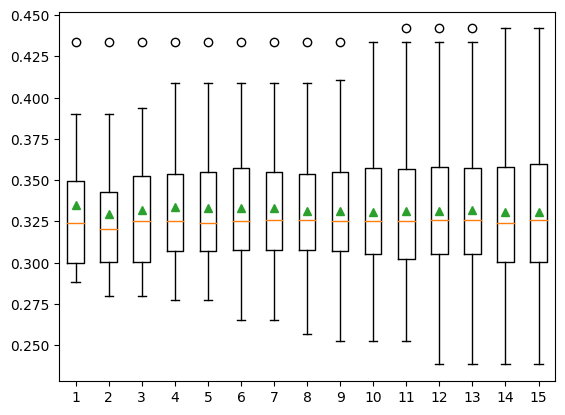

In [41]:
#Though none of the choices are perfectly symmetrical, I chose 15 repeats at is the closest to symmetrical, has no outliers, and has a low standard of error
#without sacrificing the f1 score.
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=7)
 scores_knn_5 = cross_val_score(model, features_5, target_5, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_5
repeats = range(1,16)
results_knn_5 = list()
for r in repeats:
 scores_knn_5 = evaluate_model(features_5, target_5, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_5), sem(scores_knn_5)))
 results_knn_5.append(scores_knn_5)

plt.boxplot(results_knn_5, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [42]:
#The f1 score improves slightly to 0.33 and the MCC score remains almost the same at 0.32. The fact that the scores are now more closely related
#indicates the the Stratified K-Fold cross validation technique has improved the performance of the model.
skf_knn_5 = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_5.split(features_5, target_5):
    x_train_fold, x_test_fold = features_5.iloc[train_index], features_5.iloc[test_index]
    y_train_fold, y_test_fold = target_5[train_index], target_5[test_index]
    classifier_sk_5.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_5.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_5.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_5, features_5, target_5, scoring='f1_macro', cv=skf_knn_5, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_5, features_5, target_5, scoring='matthews_corrcoef', cv=skf_knn_5, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))


Maximum Accuracy That can be obtained from this model is: 67.33668341708542 %

Minimum Accuracy: 57.78894472361809 %

Overall Accuracy: 63.105829145728656 %

Standard Deviation is: 0.021917235431490212
F1: 0.331 (0.040)
Matthews: 0.316 (0.041)


>1 f1=0.3251 se=0.014
>2 f1=0.3265 se=0.011
>3 f1=0.3253 se=0.008
>4 f1=0.3292 se=0.007
>5 f1=0.3248 se=0.006
>6 f1=0.3266 se=0.005
>7 f1=0.3253 se=0.005
>8 f1=0.3268 se=0.005
>9 f1=0.3277 se=0.004
>10 f1=0.3289 se=0.004
>11 f1=0.3299 se=0.004
>12 f1=0.3285 se=0.004
>13 f1=0.3281 se=0.004
>14 f1=0.3282 se=0.004
>15 f1=0.3286 se=0.004


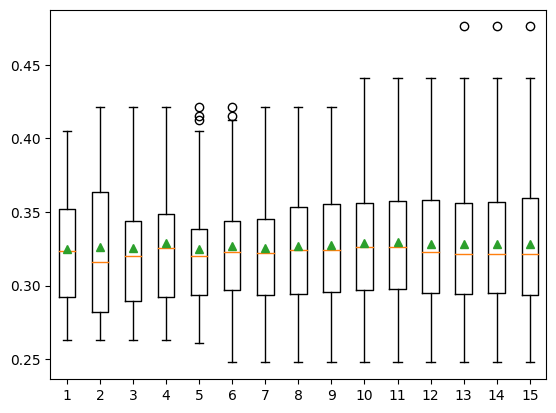

In [43]:
#For this model, 10 appears to be the optimal number of repeats, as the standard error begins to stabilize, it is relatively symmetrical, and has no outliers.
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=7)
 scores_knn_5 = cross_val_score(model, features_5, target_5, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_5
repeats = range(1,16)
results_knn_5 = list()
for r in repeats:
 scores_knn_5 = evaluate_model(features_5, target_5, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_5), sem(scores_knn_5)))
 results_knn_5.append(scores_knn_5)

plt.boxplot(results_knn_5, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [44]:
#Once again, f1 and MCC remain the same at 0.33 and 0.32. This indicates that the model is stable and improved by the use of cross-validation techniques.
cv_5 = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
acc_scores = cross_val_score(classifier_5, features_5, target_5, scoring='accuracy', cv=cv_5, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(acc_scores), std(acc_scores)))
scores_f1 = cross_val_score(classifier_5, features_5, target_5, scoring='f1_macro', cv=cv_5, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_5, features_5, target_5, scoring='matthews_corrcoef', cv=cv_5, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

Accuracy: 0.632 (0.033)
F1: 0.329 (0.043)
Matthews: 0.318 (0.045)


Repeating with the 3 Class Dataset

In [45]:
#Intializing KNN model for optimal number of neighbors. We will choose 3 because it is in between our two evaluation metrics' optimal number of neighbors.
x_train_3, x_test_3, Y_train_3, Y_test_3 = train_test_split(features_3, target_3, train_size = 0.8, random_state=42)

f1 = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_3,Y_train_3)
    yhat_3 = neigh.predict(x_test_3)
    f1.append(metrics.f1_score(Y_test_3, yhat_3, average='macro'))
print("Maximum f1:-",max(f1),"at K =",f1.index(max(f1)))

MCC = []
for i in range (1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_3,Y_train_3)
    yhat_3 = neigh.predict(x_test_3)
    MCC.append(matthews_corrcoef(Y_test_3, yhat_3))
print("Maximum MCC:-",max(MCC),"at K =",MCC.index(max(MCC)))

Maximum f1:- 0.527985355128693 at K = 2
Maximum MCC:- 0.4018410212914906 at K = 4


In [46]:
#f1 score of initial test is 0.53, however the MCC score lags behind at 0.40.
classifier_3 = KNeighborsClassifier(n_neighbors=3)
classifier_3.fit(x_train_3, Y_train_3)

y_pred_3 = classifier_3.predict(x_test_3)
print(classification_report(Y_test_3, y_pred_3))
print('Matthews:', matthews_corrcoef(Y_test_3, y_pred_3))

              precision    recall  f1-score   support

        High       0.46      0.57      0.51        65
         Low       0.85      0.87      0.86       285
      Medium       0.30      0.16      0.21        49

    accuracy                           0.74       399
   macro avg       0.54      0.54      0.53       399
weighted avg       0.72      0.74      0.73       399

Matthews: 0.39922273081171467


In [47]:
classifier_sk_3 = KNeighborsClassifier(n_neighbors=3)

>1 f1=0.5256 se=0.012
>2 f1=0.5364 se=0.008
>3 f1=0.5346 se=0.007
>4 f1=0.5350 se=0.005
>5 f1=0.5362 se=0.005
>6 f1=0.5352 se=0.005
>7 f1=0.5332 se=0.004
>8 f1=0.5339 se=0.004
>9 f1=0.5334 se=0.004
>10 f1=0.5335 se=0.004
>11 f1=0.5342 se=0.004
>12 f1=0.5331 se=0.003
>13 f1=0.5328 se=0.003
>14 f1=0.5335 se=0.003
>15 f1=0.5336 se=0.003


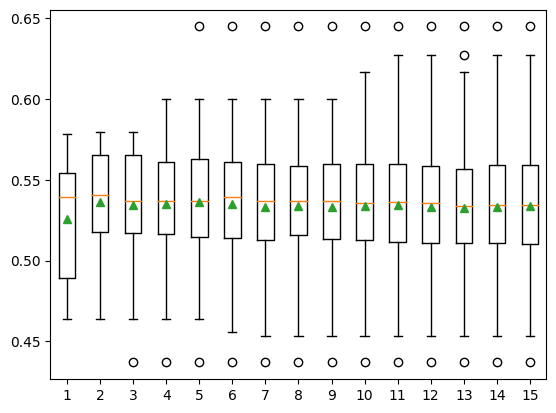

In [48]:
#For this model I chose 5 repeats based on previously mentioned evaluation metrics.
def evaluate_model(X, y, repeats):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=3)
 scores_knn_3 = cross_val_score(model, features_3, target_3, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_3
repeats = range(1,16)
results_knn_3 = list()
for r in repeats:
 scores_knn_3 = evaluate_model(features_3, target_3, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_3), sem(scores_knn_3)))
 results_knn_3.append(scores_knn_3)

plt.boxplot(results_knn_3, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [49]:
#After Stratified K-fold cross-validation, f1 score is 0.54 and MCC score difference has not improved at 0.41.
skf_knn_3 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf_knn_3.split(features_3, target_3):
    x_train_fold, x_test_fold = features_3.iloc[train_index], features_3.iloc[test_index]
    y_train_fold, y_test_fold = target_3[train_index], target_3[test_index]
    classifier_sk_3.fit(x_train_fold, y_train_fold)
    y_pred = classifier_sk_3.predict(x_test_fold)
    lst_accu_stratified.append(classifier_sk_3.score(x_test_fold, y_test_fold))

print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', std(lst_accu_stratified))
scores_f1 = cross_val_score(classifier_sk_3, features_3, target_3, scoring='f1_macro', cv=skf_knn_3, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_sk_3, features_3, target_3, scoring='matthews_corrcoef', cv=skf_knn_3, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))



Maximum Accuracy That can be obtained from this model is: 79.39698492462311 %

Minimum Accuracy: 65.5 %

Overall Accuracy: 71.97567839195979 %

Standard Deviation is: 0.027270568993587378
F1: 0.536 (0.038)
Matthews: 0.412 (0.058)


>1 f1=0.5288 se=0.011
>2 f1=0.5262 se=0.008
>3 f1=0.5246 se=0.007
>4 f1=0.5273 se=0.006
>5 f1=0.5287 se=0.006
>6 f1=0.5269 se=0.005
>7 f1=0.5282 se=0.005
>8 f1=0.5297 se=0.004
>9 f1=0.5301 se=0.004
>10 f1=0.5300 se=0.004
>11 f1=0.5301 se=0.003
>12 f1=0.5299 se=0.003
>13 f1=0.5293 se=0.003
>14 f1=0.5297 se=0.003
>15 f1=0.5302 se=0.003


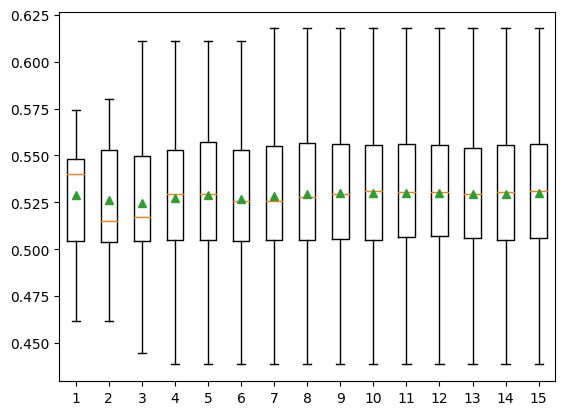

In [50]:
#For this model I chose 9 repeats as it is very symmetrically distributed and though it has a slightly higher standard of error than 13 repeats which is similarly
#distributed, its average f1 score is higher and therefore is more desireable.
def evaluate_model(X, y, repeats):
 cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
 model = KNeighborsClassifier(n_neighbors=3)
 scores_knn_3 = cross_val_score(model, features_3, target_3, scoring='f1_macro', cv=cv, n_jobs=-1)
 return scores_knn_3
repeats = range(1,16)
results_knn_3 = list()
for r in repeats:
 scores_knn_3 = evaluate_model(features_3, target_3, r)
 print('>%d f1=%.4f se=%.3f' % (r, mean(scores_knn_3), sem(scores_knn_3)))
 results_knn_3.append(scores_knn_3)

plt.boxplot(results_knn_3, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [51]:
#Values remain similar at 0.53 and 0.40 for f1 and MCC respectively. Though this indicates a stable model, f1 score is therefore not entirely representative of
#the model's performance, and MCC should be considered as it more clearly represents the impact of both negative and positive values.
cv_3 = RepeatedKFold(n_splits=10, n_repeats=9, random_state=1)
acc_scores = cross_val_score(classifier_3, features_3, target_3, scoring='accuracy', cv=cv_3, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(acc_scores), std(acc_scores)))
scores_f1 = cross_val_score(classifier_3, features_3, target_3, scoring='f1_macro', cv=cv_3, n_jobs=-1)
print('F1: %.3f (%.3f)' % (mean(scores_f1), std(scores_f1)))
scores_matthews = cross_val_score(classifier_3, features_3, target_3, scoring='matthews_corrcoef', cv=cv_3, n_jobs=-1)
print('Matthews: %.3f (%.3f)' % (mean(scores_matthews), std(scores_matthews)))

Accuracy: 0.715 (0.027)
F1: 0.530 (0.036)
Matthews: 0.402 (0.049)
